#EXIT TEST DSA DECEMBER 2023 BATCH
Data Science Problem Statement: Employee Attrition Prediction
Your task is to predict employee attrition using a given dataset. The dataset
includes various features related to employees, and the column names are selfexplanatory.

In [2]:
#importing all the neceassary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#loading our dataset
data = pd.read_csv('/content/Employee.csv')

In [4]:
#Viewing the top 5 rows
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [10]:
#dropping the index column
data.drop(0,inplace=True)

In [11]:
#Taking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32464 entries, 1 to 32464
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               32464 non-null  int64  
 1   Age                       32464 non-null  int64  
 2   Gender                    32464 non-null  object 
 3   Years at Company          32464 non-null  int64  
 4   Job Role                  32464 non-null  object 
 5   Monthly Income            32464 non-null  int64  
 6   Work-Life Balance         32460 non-null  object 
 7   Job Satisfaction          32464 non-null  object 
 8   Performance Rating        32460 non-null  object 
 9   Number of Promotions      32459 non-null  float64
 10  Overtime                  32464 non-null  object 
 11  Distance from Home        32464 non-null  int64  
 12  Education Level           32459 non-null  object 
 13  Marital Status            32460 non-null  object 
 14  Number

There are 32465 rows and 24 columns

In [12]:
# describing the data
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,32464.000000,32464.000000,32464.000000,32464.000000,32459.000000,32464.000000,32458.000000,32464.000000
mean,37217.891018,38.553813,15.791431,7301.490759,0.833821,49.920527,1.642184,55.866960
std,21486.684259,12.122352,11.282704,2150.588047,0.993379,28.554564,1.552526,25.349083
min,1.000000,18.000000,1.000000,1575.000000,0.000000,1.000000,0.000000,2.000000
25%,18614.750000,28.000000,7.000000,5657.000000,0.000000,25.000000,0.000000,36.000000
50%,37263.000000,39.000000,13.000000,7344.500000,1.000000,50.000000,1.000000,56.000000
75%,55773.750000,49.000000,23.000000,8884.000000,2.000000,75.000000,3.000000,76.000000
max,74497.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,127.000000


In [13]:
#FInding the size of the data
data.shape

(32464, 24)

In [14]:
#finding the missing values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    1
Company Reputation          1
Employee Recognition        3
Attrition                   1
dtype: int64

There are only a less number of missing values in 13 columns.

In [15]:
#dropping all the null values since there are negligibily small number of missing values compared to the number of entries in the dataset
data.dropna(axis=0,inplace=True)

In [16]:
#Again checking the null values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

All the missing values have been handled

#Exploratory Data Analysis

###Understanding the gender column

In [17]:
data['Gender'].value_counts()

Gender
Male      17778
Female    14648
Name: count, dtype: int64

<Axes: title={'center': 'Gender Count'}, xlabel='Gender'>

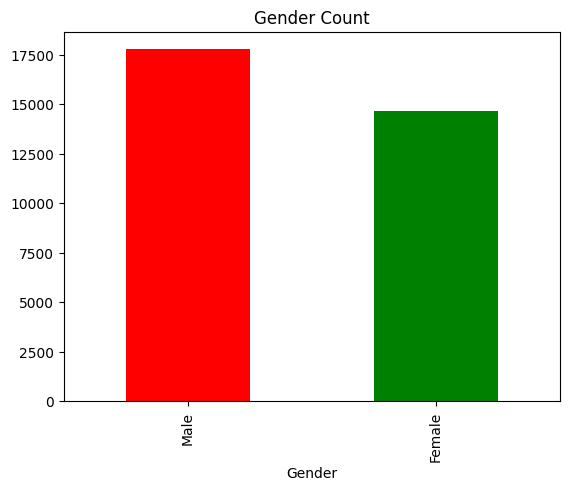

In [18]:
data['Gender'].value_counts().plot(kind='bar',color=['Red','Green'],title="Gender Count")

The number of males is more than the number of females.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

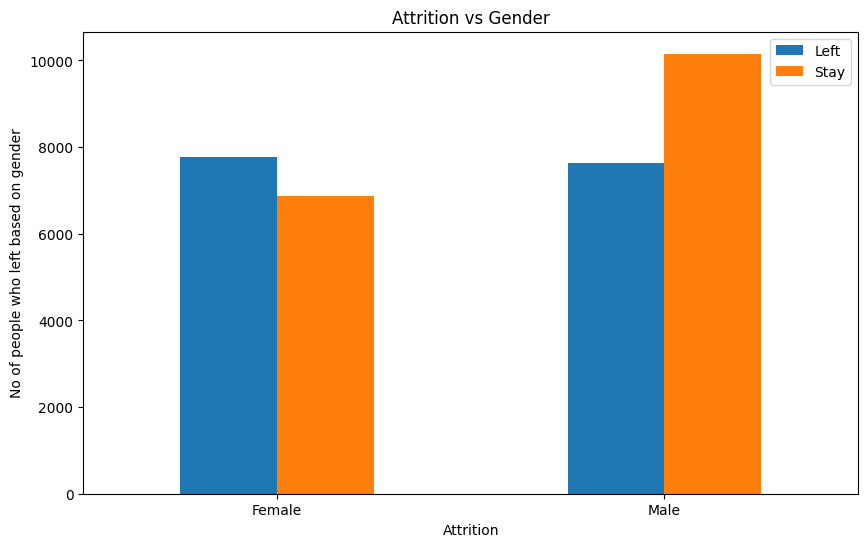

In [19]:
pd.crosstab(data['Gender'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

It is visible from the plot that more males are staying in the current jobs than the females.

In [20]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3.0,...,0.0,Mid,Medium,47,No,No,Yes,Fair,High,Left


In [21]:
data.Age.value_counts()

Age
40    819
25    818
47    813
45    806
38    805
22    802
34    800
20    796
59    794
44    791
48    784
53    784
58    781
55    780
57    779
37    778
43    777
19    776
54    774
39    772
33    771
49    767
41    766
51    764
35    763
36    762
56    761
29    760
24    755
18    755
30    755
26    753
21    753
46    751
27    749
23    749
52    748
32    748
28    745
42    745
31    739
50    738
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55'),
  Text(38, 0, '56'

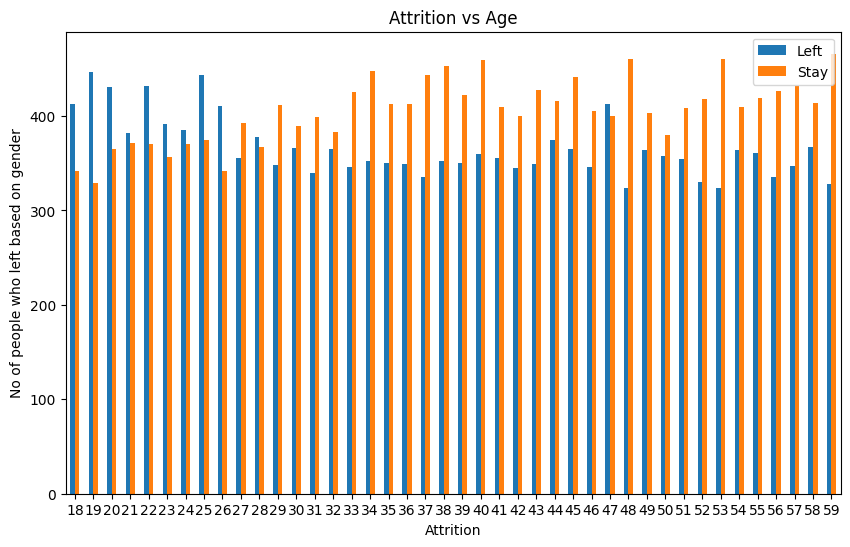

In [22]:
pd.crosstab(data['Age'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Age")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

More number of persons left their jobs below the age of 30. Those above 30 continued in their current jobs.

In [24]:
data["Job Role"].value_counts()

Job Role
Technology    8502
Healthcare    7361
Education     6758
Media         5274
Finance       4531
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Media'),
  Text(4, 0, 'Technology')])

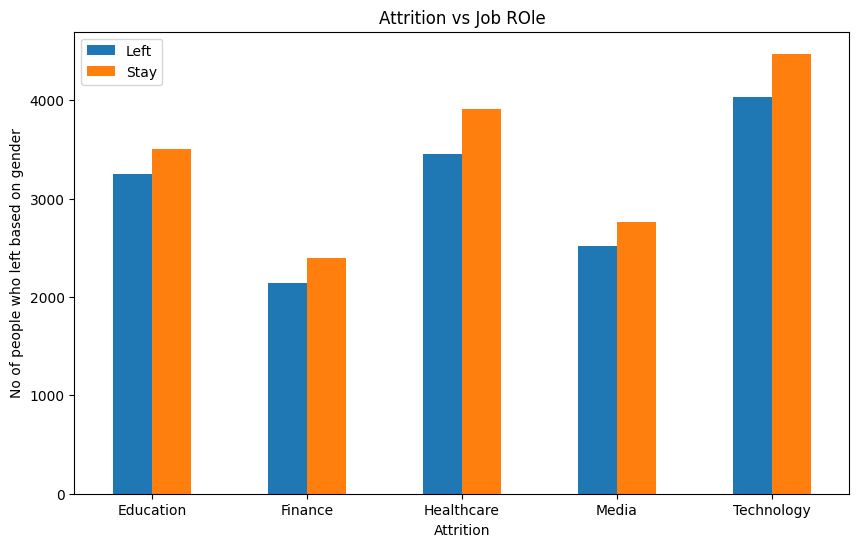

In [25]:
pd.crosstab(data['Job Role'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Job ROle")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

The persons left and stayed in the different job roles sum is almost same.

In [78]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1
5,24368,38,0,3,4,9977,1,0,1,3.0,...,0.0,1,1,47,0,0,1,1,0,0


In [79]:
data["Number of Promotions"].value_counts()

Number of Promotions
0.0    16106
1.0     8197
2.0     5957
3.0     1734
4.0      432
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0')])

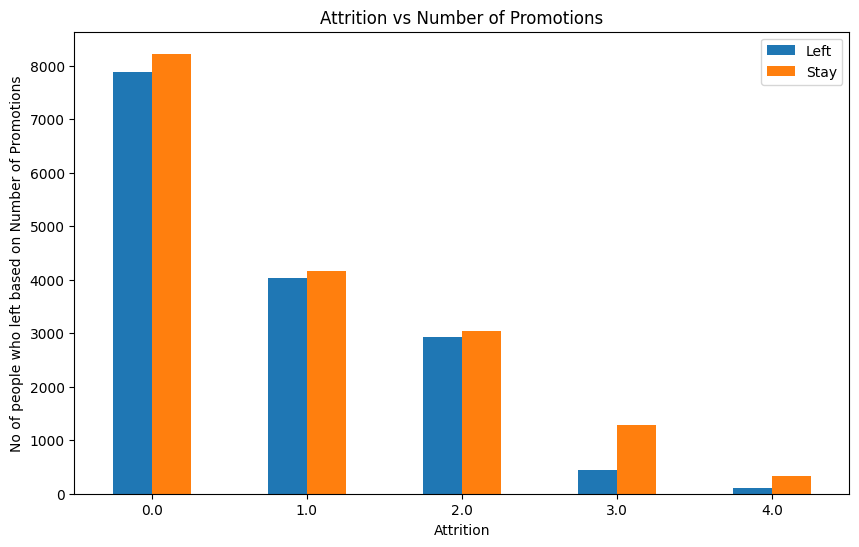

In [80]:
pd.crosstab(data['Number of Promotions'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Number of Promotions")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Number of Promotions")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

No particular trend can be found

In [81]:
data["Number of Dependents"].value_counts()

Number of Dependents
0.0    9738
1.0    8474
2.0    4780
3.0    4525
4.0    3264
5.0    1287
6.0     358
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0')])

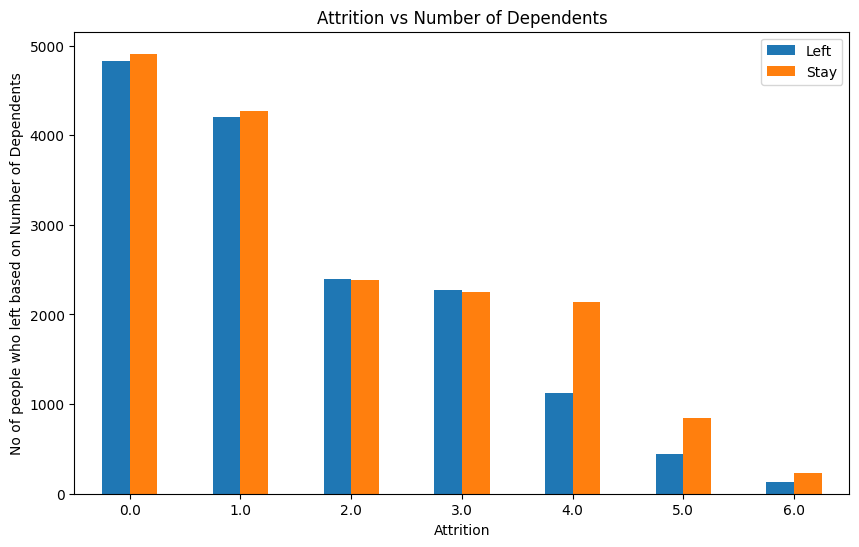

In [82]:
pd.crosstab(data['Number of Dependents'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Number of Dependents")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Number of Dependents")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

There is only slight varriation in attrition after the no. of dependents number increased from 4

I couldn't find any unrelevant columns in the datset after univariate analysis. So keeping all the features as it is in the dataset.

#Preprocessing

##Outlier Detection

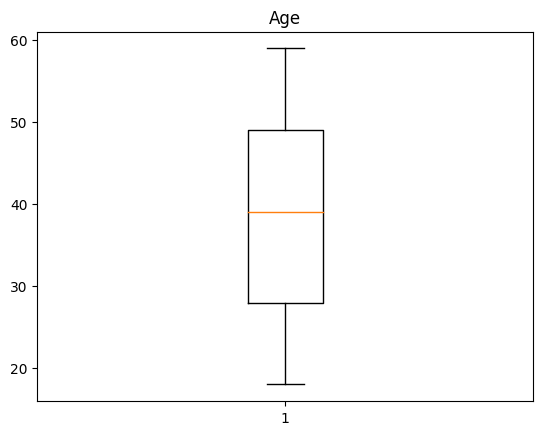

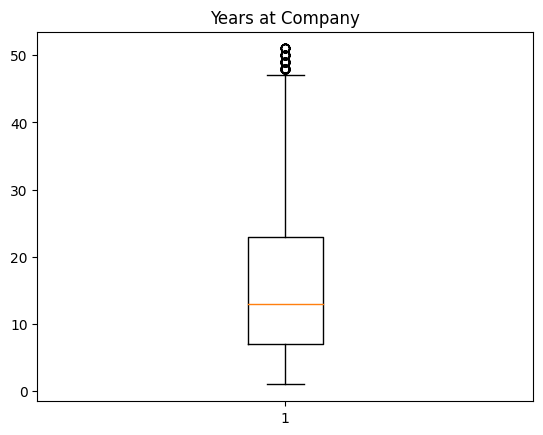

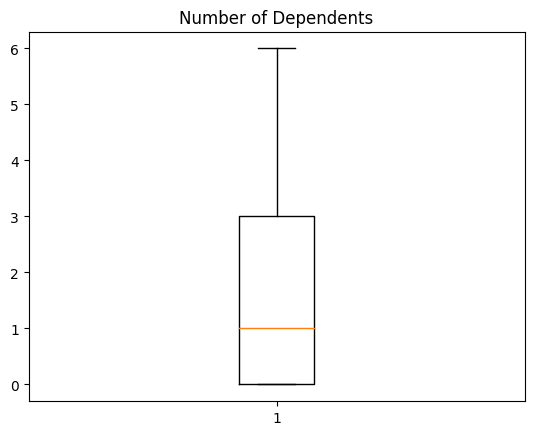

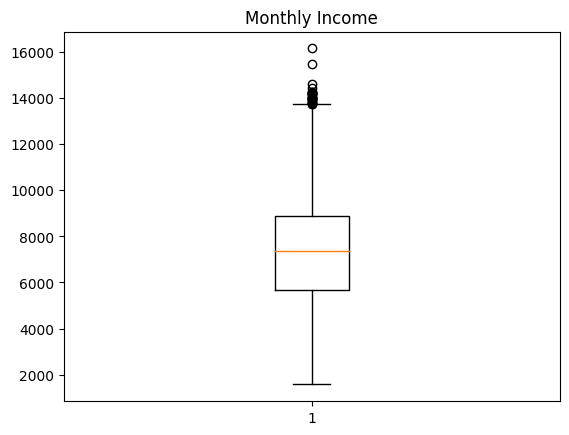

In [114]:
num_columns =['Age', 'Years at Company', 'Number of Dependents','Monthly Income']

for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i);

There are ouliers in No. of dependents and monthly income. But we cannot fill them with just median or mean. So I am leaving the outliers as such. since it depends on person to person about their salary.

##Label Encoding

In [26]:
#checking for the categorical values to be label encoded
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32426 entries, 1 to 32463
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               32426 non-null  int64  
 1   Age                       32426 non-null  int64  
 2   Gender                    32426 non-null  object 
 3   Years at Company          32426 non-null  int64  
 4   Job Role                  32426 non-null  object 
 5   Monthly Income            32426 non-null  int64  
 6   Work-Life Balance         32426 non-null  object 
 7   Job Satisfaction          32426 non-null  object 
 8   Performance Rating        32426 non-null  object 
 9   Number of Promotions      32426 non-null  float64
 10  Overtime                  32426 non-null  object 
 11  Distance from Home        32426 non-null  int64  
 12  Education Level           32426 non-null  object 
 13  Marital Status            32426 non-null  object 
 14  Number of D

In [28]:
#making a copy of the datsaet
df = data

In [29]:
#importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Gender', 'Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level', 'Marital Status', 'Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition','Attrition']:
  df[i] = encoder.fit_transform(df[i])

In [30]:
#viewing the label encoded data
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1
5,24368,38,0,3,4,9977,1,0,1,3.0,...,0.0,1,1,47,0,0,1,1,0,0


#Correlation

In [32]:
#correlation matrix
correlation_matrix = df.corr()

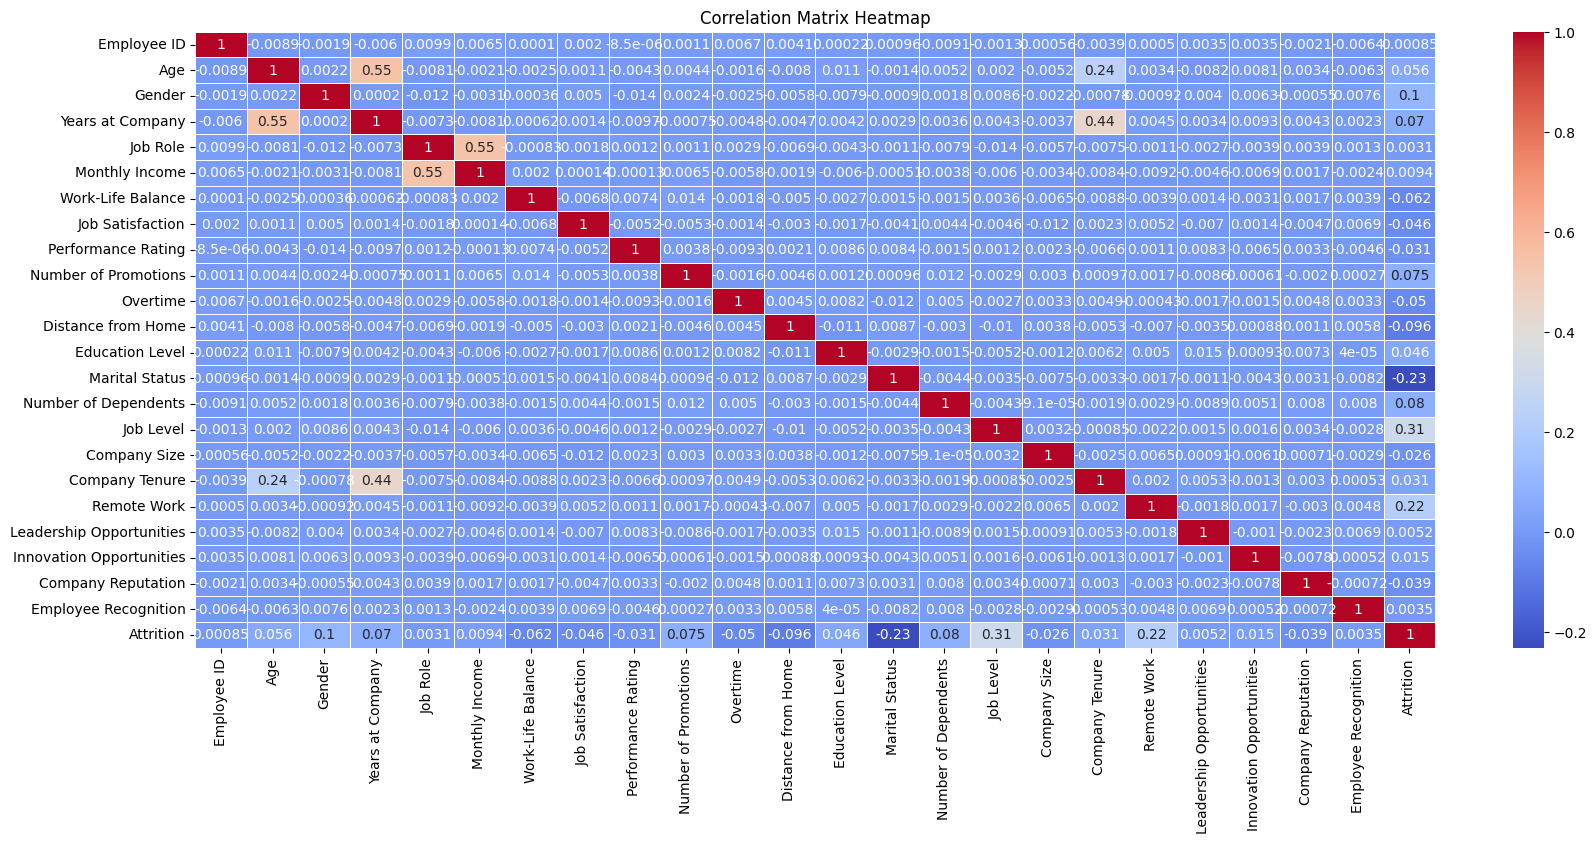

In [34]:
#plotting correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There is no relevant correlation between the features. So we cannot drop any columns

In [35]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1
5,24368,38,0,3,4,9977,1,0,1,3.0,...,0.0,1,1,47,0,0,1,1,0,0


In [38]:
#since employee id is of no relecvance with the dataset. We can drop that Empoyee Id column
df = df.drop(['Employee ID'],axis=1)

In [39]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
1,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1
5,38,0,3,4,9977,1,0,1,3.0,0,...,0.0,1,1,47,0,0,1,1,0,0


##X and y Splitting

In [40]:
##Separating the target and dependent variables
X = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

In [41]:
#Scaling the data values to standardize the range of independent variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [42]:
#Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [45]:
X_train.shape

(25940, 22)

In [47]:
X_test.shape

(6486, 22)

#Model Development

#Logistic Regression Model

In [83]:
#importing logistic regressor library form sklearn
from sklearn.linear_model import LogisticRegression

#creating object of logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

#importing accuracy parameters from sklearn.metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
#printing Confusion matrix
confusion_matrix(y_test, log_pred)


array([[2175,  933],
       [ 912, 2466]])

In [84]:
#printing the accuracy parameters
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('recall:',recall_score(y_test,log_pred))
print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.7155411655874191
Precision: 0.7255075022065314
recall: 0.7300177619893428
F1: 0.7277556440903054


#Random Forest Classifer

In [52]:
#importing necessary libraries
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
# Predicting the Test set results
y_pred=model.predict(X_test)
y_pred
# Making the Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('f1: ',f1_score(y_test,y_pred))

[[2282  826]
 [ 792 2586]]
Accuracy:  0.7505396238051187
Precision:  0.7579132473622509
recall:  0.7655417406749556
f1:  0.7617083946980855


#KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [58]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

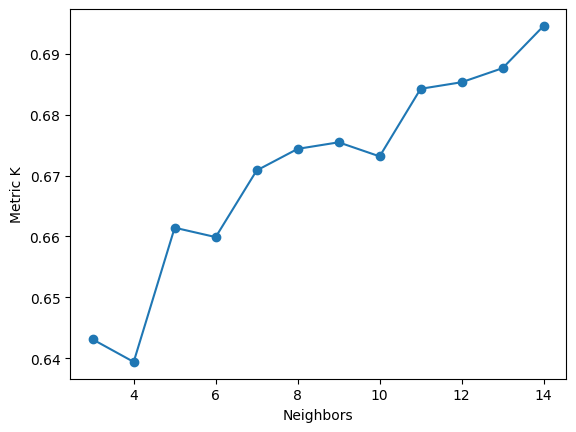

In [59]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Metric K')

In [69]:
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [70]:
confusion_matrix(y_test,knn_pred)

array([[2256,  852],
       [1268, 2110]])

In [100]:
print('Accuracy: ',accuracy_score(y_test,knn_pred))
print('Precision: ',precision_score(y_test,knn_pred))
print('recall: ',recall_score(y_test,knn_pred))
print('f1: ',f1_score(y_test,knn_pred))

Accuracy:  0.6731421523280913
Precision:  0.712356515867657
recall:  0.6246299585553582
f1:  0.665615141955836


#SVM

In [98]:
from sklearn.svm import SVC
sv_clf = SVC(kernel='linear')
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [102]:
svc_pred=sv_clf.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy: ',accuracy_score(y_test,svc_pred))
print('Precision: ',precision_score(y_test,svc_pred))
print('recall: ',recall_score(y_test,svc_pred))
print('f1: ',f1_score(y_test,svc_pred))

Accuracy:  0.7153869873573852
Precision:  0.7270302311796087
recall:  0.7261693309650681
f1:  0.7265995260663508


#Comparison of the models based on accuracy

In [107]:
model_scores={'Logistic Regression':log_reg.score(X_test,y_test),
             'KNN classifier':classifier.score(X_test,y_test),
             'Support Vector Machine':sv_clf.score(X_test,y_test),
             'Random forest':model.score(X_test,y_test)             }
model_scores

{'Logistic Regression': 0.7155411655874191,
 'KNN classifier': 0.6731421523280913,
 'Support Vector Machine': 0.7153869873573852,
 'Random forest': 0.7505396238051187}

In [108]:
#creating a dataframe to show the comparison
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare


,Logistic Regression,KNN classifier,Support Vector Machine,Random forest
accuracy,0.715541,0.673142,0.715387,0.75054


##As a conclusion, I got more accuracy for Random forest model as 75%. If the data is cleaned more perfectly the accuracies can be increased more.